# Whittle- Matérn prior

The aim of this notebook is to show simulation of the Whittle-Matérn priors described in the paper 

*Calvetti and Somersalo (2017) Inverse problems: From regularization to Bayesian inference*



sent by Thomas

In [21]:
# Install the geostatistical package "gstlearn" (developped by our team)
# It is stored on incubator of python packages, so you have to uncomment the next line

# !pip install -i https://test.pypi.org/simple/ gstlearn

In [22]:
# !git clone git://github.com/scikit-sparse/scikit-sparse.git
# !sudo apt-get install python-scipy libsuitesparse-dev
# !pip install --user scikit-sparse

In [1]:
import gstlearn as gl
# import gstlearn.plot as gp

#sksparse is a little bit tricky to install
from sksparse.cholmod import cholesky

#common packages
import scipy as sc
from scipy.sparse import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def simulate(ranges = [5,10], variance = 10, param = 1, nx = [100,100],mu=2500):
    #Creation of the covariance model (Whittle-Matérn prior)
    model = gl.Model.createFromParam(gl.ECov.BESSEL_K,param = param,
                                     sill = variance, ranges = ranges)
    
    #Creation of the grid 
    mesh = gl.MeshETurbo(nx)
    
    #Creation of the precision matrix (inverse of the covariance)
    precisionOpMat = gl.PrecisionOpCs(mesh,model,0,gl.EPowerPT.ONE,False)
    Qtr = gl.csToTriplet(precisionOpMat.getQ())
    Qmat = sc.sparse.csc_matrix((np.array(Qtr.values), (np.array(Qtr.rows), np.array(Qtr.cols))))
    
    #Cholesky decomposition
    cholQ = cholesky(Qmat)
    
    #Random vector
    u = np.random.normal(size=np.prod(Qmat.shape[0]))
    
    # Apply the inverse of the Cholesky decomposition
    
    simu = cholQ.apply_Pt(cholQ.solve_DLt(u))
    
    #Return the simulation (reshaped)
    
    return simu.reshape(mesh.getGrid().getNXs())+mu, Qmat

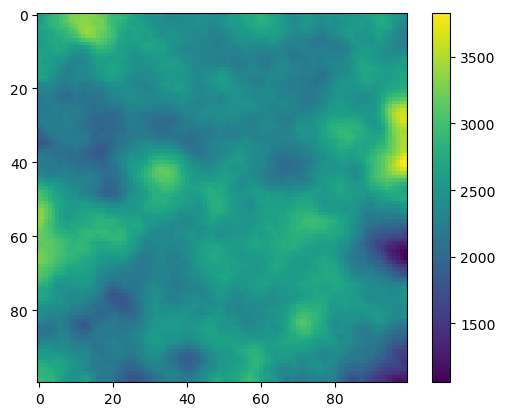

In [5]:
mu=2500
nz,nx = 100,100
simu, Q = simulate(ranges = [20,20],param=1,nx=[nz,nx],variance=500,mu=mu)
plt.imshow(simu)
a=plt.colorbar()

In [6]:
v = np.zeros([100, 100]) + mu
v = v.flatten()
# v = np.expand_dims(v,-1)
v.T.dot(Q.toarray()).dot(v)

292477.0494830265

## To do 

Play with the parameters **ranges** (use different values for the two components), **variance** and **param** (which has to be an integer)

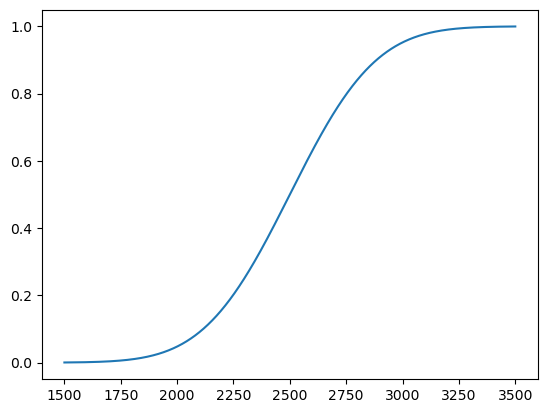

In [11]:
x = np.linspace(1500,3500,2001)
plt.plot(x,sc.stats.norm.cdf(x, loc=2500, scale=300))

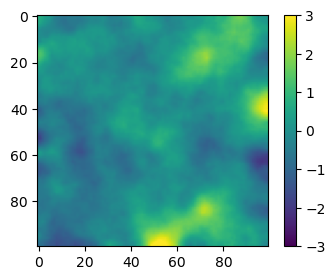

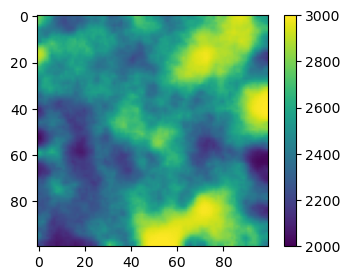

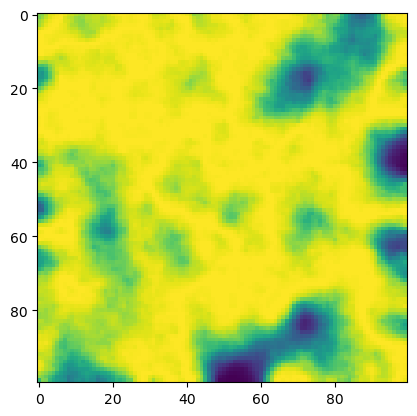

In [18]:
u = np.zeros([nz, nx])
u, _ = simulate(ranges = [20,20],param=1,nx=[nz,nx],variance=1,mu=0)
plt.figure(figsize=(4,3))
plt.imshow(u,vmin=-3,vmax=3)
plt.colorbar()
plt.show()

plt.figure(figsize=(4,3))
def f(u, vmin=2000, vmax=3000):
    # cdf of gaussian
    cdf = sc.stats.norm.cdf(u, loc=0, scale=1)
    v = (vmax-vmin)*cdf + vmin
    # # tanh
    # v = 500*np.tanh(u) + 2500
    # # sigmoid
    # sigmoid = 1/(1+np.exp(-u))
    # v = (vmax-vmin)*sigmoid + vmin

    return v.reshape((nz,nx))

v = f(u.flatten())
plt.imshow(v.reshape((nz,nx)),vmin=2000,vmax=3000)
plt.colorbar()
plt.show()

df = sc.misc.derivative(f,u)
plt.imshow(df.reshape((nz,nx)))

In [16]:
f(u).min()

2000.4826783616163